In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split
from scipy.stats import zscore #to remove outliers
import requests
import io
import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport
from pandas_profiling import ProfileReport
%matplotlib inline
from sklearn import tree

In [2]:
#Importing dataset

In [70]:
df = pd.read_csv("database_IND.csv")

# eda

In [71]:
df.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [72]:
df.tail(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.59665,865.4,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
df.shape # check the data dimension

(908, 25)

In [74]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [76]:
df.columns # check the column names for EDA

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [77]:
#Dropping the columns which are not required
df = df.drop(labels = 'other_fuel2', axis = 1)

In [78]:
df = df.drop(labels = 'other_fuel3', axis = 1)

In [79]:
df = df.drop(labels = 'wepp_id', axis = 1)

In [80]:
df = df.drop(labels = 'country', axis = 1)

In [81]:
df = df.drop(labels = 'country_long', axis = 1)

In [82]:
df = df.drop(labels = 'estimated_generation_gwh', axis = 1)

In [83]:
df = df.drop(labels = 'url', axis = 1)

In [84]:
df = df.drop(labels = 'geolocation_source', axis = 1)

In [85]:
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority


In [101]:
df.isna().sum() #checked for null values

name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1                 0
commissioning_year        380
owner                       0
source                      0
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source      0
dtype: int64

## handle null values

In [102]:
#   Null values are present in latitude, longitude, commissioning_year, year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 columns

In [106]:
df.replace(np.nan, 0)

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,0,658,2.5,28.1839,73.2407,6,3,2011.0,229,109,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,1,520,98.0,24.7663,74.6090,1,3,0.0,258,174,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,2,854,39.2,21.9038,69.3732,7,3,0.0,2,21,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,3,0,135.0,23.8712,91.3602,2,3,2004.0,280,22,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,0
4,4,1,1800.0,21.9603,82.4091,1,2,2015.0,280,22,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,903,494,1600.0,16.2949,77.3568,1,2,2016.0,280,22,2018.0,0.000000,0.000000,0.994875,233.596650,865.400000,0
904,904,823,3.0,12.8932,78.1654,6,3,0.0,114,77,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
905,905,892,25.5,15.2758,75.5811,7,3,0.0,280,21,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
906,906,540,80.0,24.3500,73.7477,1,3,0.0,91,59,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [107]:
mean =df ['other_fuel1'].mean()
df['other_fuel1'].fillna(mean)

0      3
1      3
2      3
3      3
4      2
      ..
903    2
904    3
905    3
906    3
907    3
Name: other_fuel1, Length: 908, dtype: int32

In [108]:
mean =df ['commissioning_year'].mean()
df['commissioning_year'].fillna(mean)

0      2011.000000
1      1996.876894
2      1996.876894
3      2004.000000
4      2015.000000
          ...     
903    2016.000000
904    1996.876894
905    1996.876894
906    1996.876894
907    1996.876894
Name: commissioning_year, Length: 908, dtype: float64

In [109]:
mean =df ['year_of_capacity_data'].mean()
df['year_of_capacity_data'].fillna(mean)

0      2018.0
1      2018.0
2      2018.0
3      2018.0
4      2018.0
        ...  
903    2018.0
904    2018.0
905    2018.0
906    2018.0
907    2018.0
Name: year_of_capacity_data, Length: 908, dtype: float64

In [110]:
mean =df ['generation_gwh_2013'].mean()
df['generation_gwh_2013'].fillna(mean)

0      2304.059202
1      2304.059202
2      2304.059202
3       631.777928
4      1668.290000
          ...     
903    2304.059202
904    2304.059202
905    2304.059202
906    2304.059202
907    2304.059202
Name: generation_gwh_2013, Length: 908, dtype: float64

In [111]:
mean =df ['generation_gwh_2014'].mean()
df['generation_gwh_2014'].fillna(mean)

0      2420.393316
1      2420.393316
2      2420.393316
3       617.789264
4      3035.550000
          ...     
903    2420.393316
904    2420.393316
905    2420.393316
906    2420.393316
907    2420.393316
Name: generation_gwh_2014, Length: 908, dtype: float64

In [112]:
mean =df ['generation_gwh_2015'].mean()
df['generation_gwh_2015'].fillna(mean)

0      2414.072373
1      2414.072373
2      2414.072373
3       843.747000
4      5916.370000
          ...     
903       0.994875
904    2414.072373
905    2414.072373
906    2414.072373
907    2414.072373
Name: generation_gwh_2015, Length: 908, dtype: float64

In [113]:
mean =df ['generation_gwh_2016'].mean()
df['generation_gwh_2016'].fillna(mean)

0      2453.936292
1      2453.936292
2      2453.936292
3       886.004428
4      6243.000000
          ...     
903     233.596650
904    2453.936292
905    2453.936292
906    2453.936292
907    2453.936292
Name: generation_gwh_2016, Length: 908, dtype: float64

In [114]:
mean =df ['generation_gwh_2017'].mean()
df['generation_gwh_2017'].fillna(mean)

0      2531.754458
1      2531.754458
2      2531.754458
3       663.774500
4      5385.579736
          ...     
903     865.400000
904    2531.754458
905    2531.754458
906    2531.754458
907    2531.754458
Name: generation_gwh_2017, Length: 908, dtype: float64

In [115]:
mean =df ['generation_data_source'].mean()
df['generation_data_source'].fillna(mean)

0      1
1      1
2      1
3      0
4      0
      ..
903    0
904    1
905    1
906    1
907    1
Name: generation_data_source, Length: 908, dtype: int32

In [116]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in same column
df['name'] = labelencoder.fit_transform(df['name'])
df['gppd_idnr'] = labelencoder.fit_transform(df['gppd_idnr'])
df['primary_fuel'] = labelencoder.fit_transform(df['primary_fuel'])

df['other_fuel1'] = labelencoder.fit_transform(df['other_fuel1'])
df['owner'] = labelencoder.fit_transform(df['owner'])
df['source'] = labelencoder.fit_transform(df['source'])

df['generation_data_source'] = labelencoder.fit_transform(df['generation_data_source'])
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,0,658,2.5,28.1839,73.2407,6,3,2011.0,229,109,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,520,98.0,24.7663,74.6090,1,3,NaN,258,174,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2,854,39.2,21.9038,69.3732,7,3,NaN,2,21,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3,0,135.0,23.8712,91.3602,2,3,2004.0,280,22,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,0
4,4,1,1800.0,21.9603,82.4091,1,2,2015.0,280,22,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,903,494,1600.0,16.2949,77.3568,1,2,2016.0,280,22,2018.0,NaN,NaN,0.994875,233.596650,865.400000,0
904,904,823,3.0,12.8932,78.1654,6,3,NaN,114,77,NaN,NaN,NaN,NaN,NaN,NaN,1
905,905,892,25.5,15.2758,75.5811,7,3,NaN,280,21,NaN,NaN,NaN,NaN,NaN,NaN,1
906,906,540,80.0,24.3500,73.7477,1,3,NaN,91,59,NaN,NaN,NaN,NaN,NaN,NaN,1


In [117]:
df.describe()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
count,908.00000,908.00000,908.000000,862.000000,862.000000,908.000000,908.000000,528.000000,908.000000,908.000000,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,908.000000
mean,453.50000,453.50000,321.046378,21.196189,77.447848,3.205947,2.776432,1996.876894,227.534141,43.823789,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.504405
std,262.26132,262.26132,580.221767,6.248627,4.907260,2.281339,0.429886,17.047817,83.895877,44.624092,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,0.500256
min,0.00000,0.00000,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,226.75000,226.75000,16.837500,16.771575,74.258975,1.000000,3.000000,1988.000000,188.750000,22.000000,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,0.000000
50%,453.50000,453.50000,60.000000,21.778300,76.719250,3.000000,3.000000,2000.000000,280.000000,22.000000,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,1.000000
75%,680.25000,680.25000,388.125000,25.516375,79.441475,6.000000,3.000000,2011.250000,280.000000,29.250000,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,1.000000
max,907.00000,907.00000,4760.000000,34.649000,95.408000,7.000000,3.000000,2018.000000,280.000000,190.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,1.000000


In [118]:
df['primary_fuel'].nunique() #check the number of unique values in "primary_fuel" column post label encoding

8

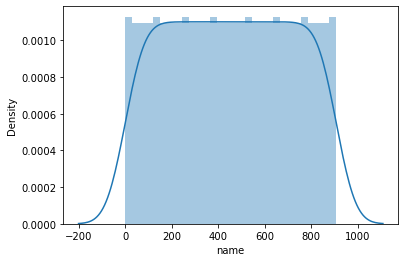

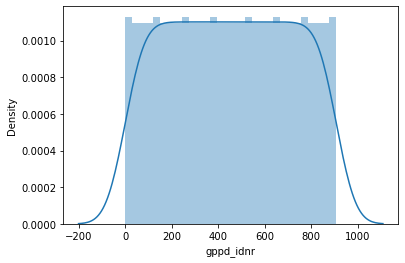

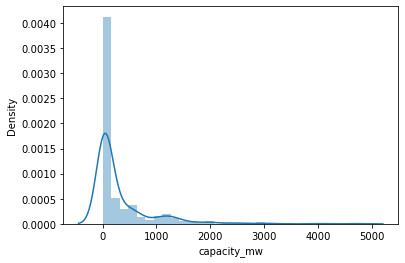

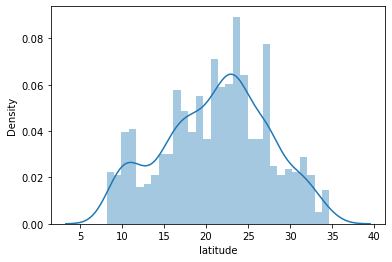

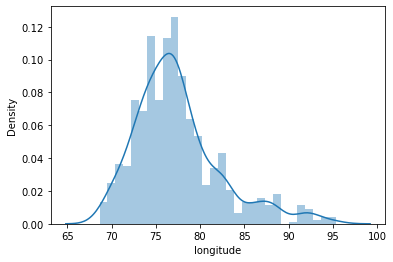

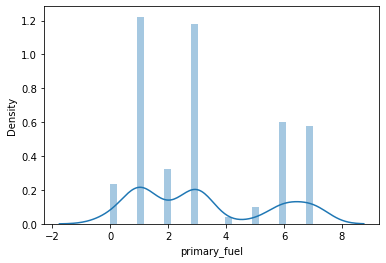

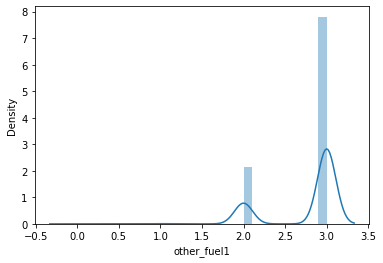

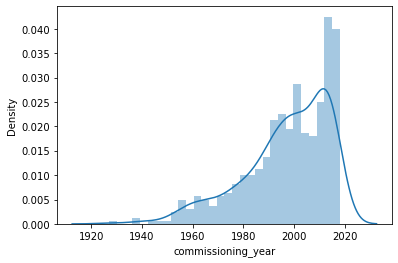

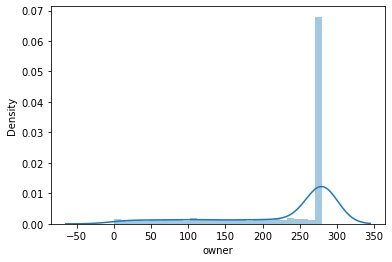

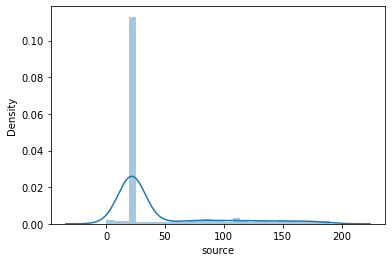

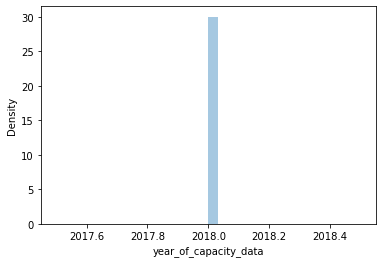

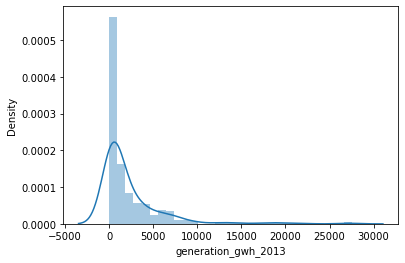

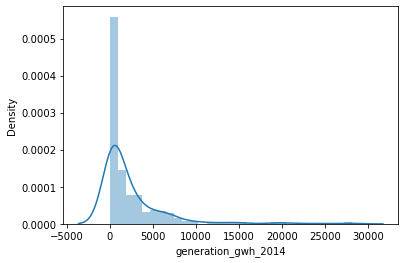

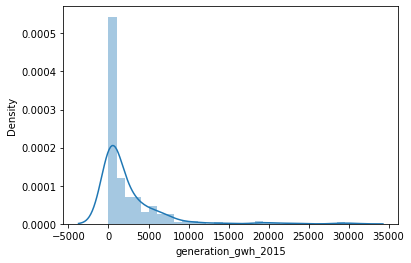

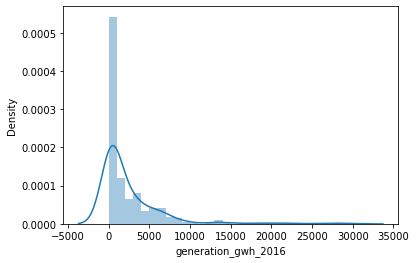

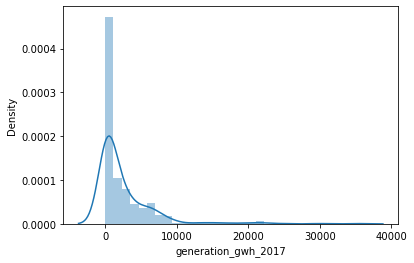

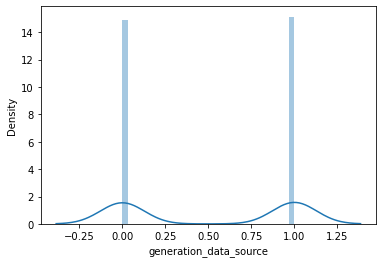

In [119]:
for i in df.columns: 
    sns.distplot(df[i],kde=True,bins=30)
    plt.show()

In [120]:
#data is not normally distributed, hence replacing null values with median
df['primary_fuel'] = df['primary_fuel'].fillna(value=df['primary_fuel'].median())

<AxesSubplot:xlabel='primary_fuel', ylabel='Density'>

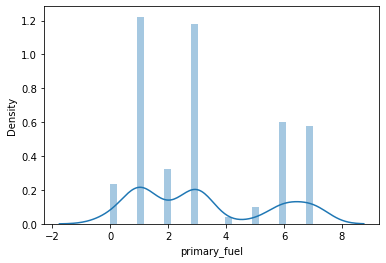

In [121]:
sns.distplot(df['primary_fuel'],kde=True,bins=30)

In [122]:
df = df.rename(columns={'primary_fuel': 'target'})

In [123]:
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,target,other_fuel1,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,0,658,2.5,28.1839,73.2407,6,3,2011.0,229,109,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,520,98.0,24.7663,74.6090,1,3,NaN,258,174,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2,854,39.2,21.9038,69.3732,7,3,NaN,2,21,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3,0,135.0,23.8712,91.3602,2,3,2004.0,280,22,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,0
4,4,1,1800.0,21.9603,82.4091,1,2,2015.0,280,22,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,0


In [124]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [63]:
#profile

In [ ]:
## check for outliers

In [46]:
#remove outliers before skewness check and before x, y split

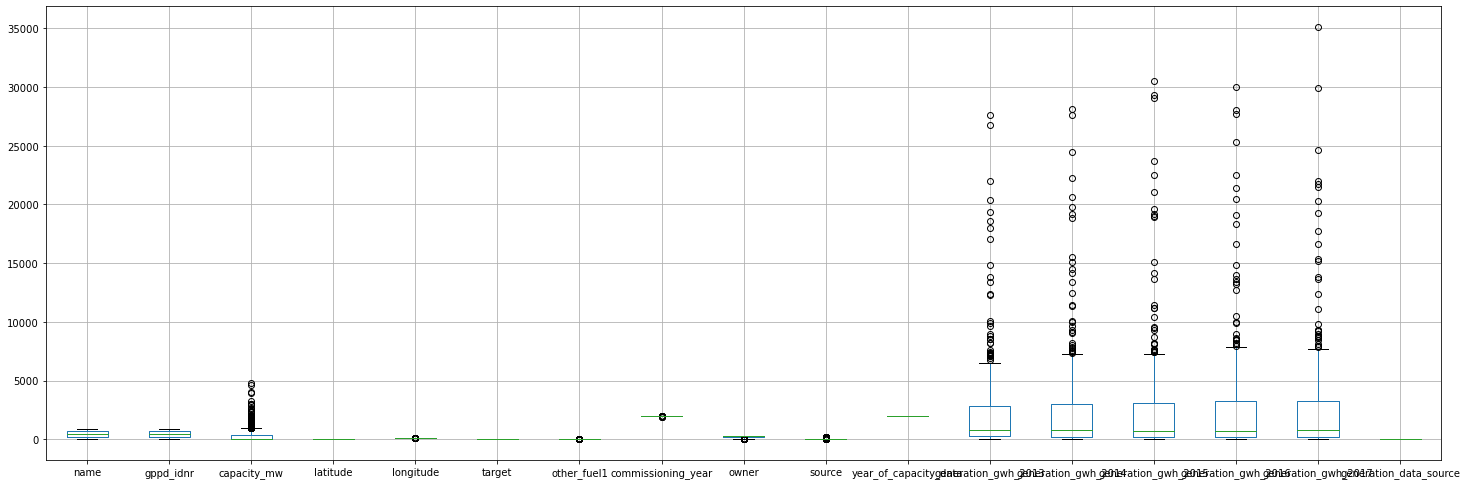

In [125]:
df.boxplot(figsize=[25,10])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [126]:
#Removing outliers by z score

In [127]:
from scipy.stats import zscore
z = np.abs(zscore(df))
new_df = df[(z<3).all(axis=1)]

In [128]:
new_df.shape

(0, 17)

In [129]:
df.shape

(908, 17)

In [130]:
dataloss = ((908-0)/908)*100

In [131]:
dataloss

100.0

In [132]:
#Outliers are removed since data loss is less than 7%.

In [133]:
df= new_df

## check co-relation

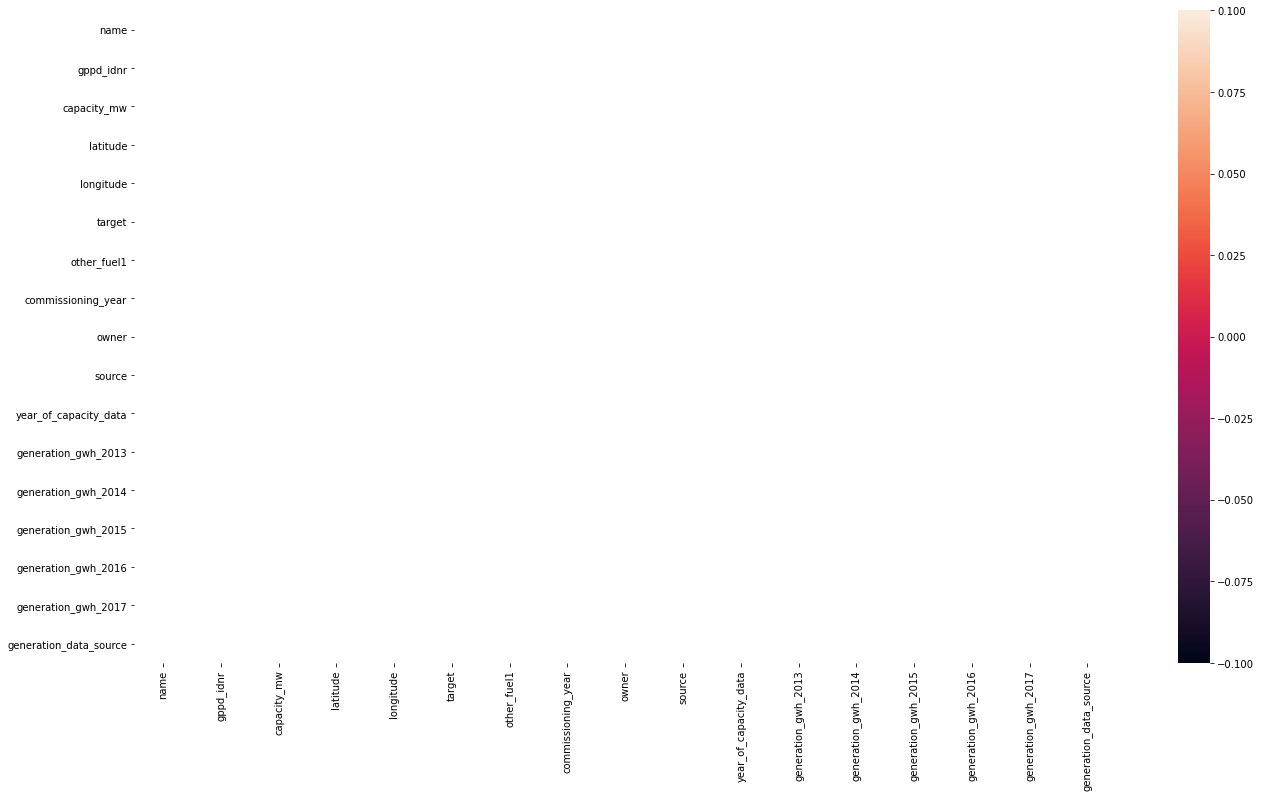

In [62]:
plt.figure(figsize=[22,12])
cor = df.corr()
sns.heatmap(cor, annot = True)
plt.show()

In [42]:
#Arrange co-relation in descending order. Dropping columns should be the last option to prevent data loss.

In [43]:
cor["target"].sort_values(ascending=False)

target                     1.000000
OverTime                   0.257237
MaritalStatus              0.160960
DistanceFromHome           0.081788
JobRole                    0.064283
Department                 0.063637
NumCompaniesWorked         0.050314
Gender                     0.036252
EducationField             0.023585
MonthlyRate                0.014888
PerformanceRating          0.010781
HourlyRate                -0.001532
PercentSalaryHike         -0.006267
YearsSinceLastPromotion   -0.029263
DailyRate                 -0.057220
EnvironmentSatisfaction   -0.112393
JobInvolvement            -0.133957
StockOptionLevel          -0.136676
Age                       -0.159366
MonthlyIncome             -0.161848
YearsWithCurrManager      -0.162297
YearsAtCompany            -0.166455
YearsInCurrentRole        -0.171015
JobLevel                  -0.171968
TotalWorkingYears         -0.185619
Name: target, dtype: float64

In [44]:
df.columns

Index(['Age', 'target', 'DailyRate', 'Department', 'DistanceFromHome',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [45]:
columns = ['Age', 'target', 'DailyRate', 'Department', 'DistanceFromHome',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [ ]:
sns.pairplot(df[columns])

## check for skewness

In [46]:
x = df.drop('target',axis=1)
y = df['target']

In [47]:
x.skew() # check skewness

Age                        0.472280
DailyRate                 -0.017078
Department                 0.183919
DistanceFromHome           0.954752
EducationField             0.544868
EnvironmentSatisfaction   -0.325285
Gender                    -0.417296
HourlyRate                -0.030481
JobInvolvement            -0.501401
JobLevel                   1.126075
JobRole                   -0.386843
MaritalStatus             -0.160952
MonthlyIncome              1.544770
MonthlyRate                0.030596
NumCompaniesWorked         1.037715
OverTime                   0.954751
PercentSalaryHike          0.800592
PerformanceRating          1.931566
StockOptionLevel           0.962332
TotalWorkingYears          1.034487
YearsAtCompany             1.248623
YearsInCurrentRole         0.726675
YearsSinceLastPromotion    1.756335
YearsWithCurrManager       0.694506
dtype: float64

In [48]:
from sklearn.preprocessing import power_transform
df_new = power_transform(x, method='yeo-johnson')

df_new = pd.DataFrame(df_new, columns = x.columns)

In [49]:
df_new.skew()

Age                       -0.004079
DailyRate                 -0.199742
Department                 0.015095
DistanceFromHome          -0.008149
EducationField            -0.008642
EnvironmentSatisfaction   -0.205472
Gender                    -0.417296
HourlyRate                -0.105678
JobInvolvement            -0.018801
JobLevel                   0.110769
JobRole                   -0.337641
MaritalStatus             -0.158253
MonthlyIncome              0.027700
MonthlyRate               -0.176560
NumCompaniesWorked         0.016175
OverTime                   0.954751
PercentSalaryHike          0.112128
PerformanceRating          0.000000
StockOptionLevel           0.089929
TotalWorkingYears         -0.009666
YearsAtCompany            -0.025230
YearsInCurrentRole        -0.069631
YearsSinceLastPromotion    0.212301
YearsWithCurrManager      -0.070570
dtype: float64

In [50]:
x.skew()

Age                        0.472280
DailyRate                 -0.017078
Department                 0.183919
DistanceFromHome           0.954752
EducationField             0.544868
EnvironmentSatisfaction   -0.325285
Gender                    -0.417296
HourlyRate                -0.030481
JobInvolvement            -0.501401
JobLevel                   1.126075
JobRole                   -0.386843
MaritalStatus             -0.160952
MonthlyIncome              1.544770
MonthlyRate                0.030596
NumCompaniesWorked         1.037715
OverTime                   0.954751
PercentSalaryHike          0.800592
PerformanceRating          1.931566
StockOptionLevel           0.962332
TotalWorkingYears          1.034487
YearsAtCompany             1.248623
YearsInCurrentRole         0.726675
YearsSinceLastPromotion    1.756335
YearsWithCurrManager       0.694506
dtype: float64

## find best random state

In [51]:
#for classification problems

In [52]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predLR = LR.predict(x_test)
    acc = accuracy_score(y_test, predLR)
    if acc>maxAccu:
        maxAccu = acc
        maxRS=i
print("Best accuracy is", maxAccu," on Random State ",maxRS)

Best accuracy is 0.8800959232613909  on Random State  30


In [53]:
#We have found the best random state as 30. We will create our train_test_split using this random state.

## test train split

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

## handle data imbalance

<AxesSubplot:xlabel='target', ylabel='count'>

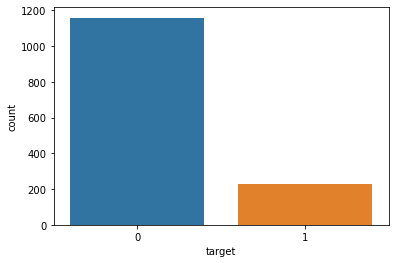

In [55]:
sns.countplot(df['target'])

In [56]:
y.value_counts()

0    1158
1     229
Name: target, dtype: int64

### classification 

In [57]:
#logistic_regression

In [58]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)

print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8800959232613909
[[361   2]
 [ 48   6]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.94       363
           1       0.75      0.11      0.19        54

    accuracy                           0.88       417
   macro avg       0.82      0.55      0.56       417
weighted avg       0.87      0.88      0.84       417



In [59]:
#support vector machines

In [60]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8705035971223022
[[363   0]
 [ 54   0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       363
           1       0.00      0.00      0.00        54

    accuracy                           0.87       417
   macro avg       0.44      0.50      0.47       417
weighted avg       0.76      0.87      0.81       417



In [61]:
#decisiontree

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)

print(accuracy_score(y_test,preddt))
print(classification_report(y_test,preddt))
print(confusion_matrix(y_test,preddt))

0.8081534772182254
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       363
           1       0.30      0.37      0.33        54

    accuracy                           0.81       417
   macro avg       0.60      0.62      0.61       417
weighted avg       0.83      0.81      0.82       417

[[317  46]
 [ 34  20]]


In [63]:
#random forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)

print(accuracy_score(y_test,predrf))
print(classification_report(y_test,predrf))
print(confusion_matrix(y_test,predrf))

0.882494004796163
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       363
           1       0.65      0.20      0.31        54

    accuracy                           0.88       417
   macro avg       0.77      0.59      0.62       417
weighted avg       0.86      0.88      0.85       417

[[357   6]
 [ 43  11]]


## check cross-validation scores

In [65]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR, x, y, cv=5)
print("CrossValidation Score of LogisticRegression Model: ", scr.mean())

CrossValidation Score of LogisticRegression Model:  0.8392203204945069


In [66]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(dt, x, y, cv=5)
print("CrossValidation Score of DecisionTree Model: ", scr.mean())

CrossValidation Score of DecisionTree Model:  0.7685842661610783


In [67]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(rf, x, y, cv=5)
print("CrossValidation Score of RandomForest Model: ", scr.mean())

CrossValidation Score of RandomForest Model:  0.8529127600446719


In [68]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(svc, x, y, cv=5)
print("CrossValidation Score of SVC Model: ", scr.mean())

CrossValidation Score of SVC Model:  0.8348959821312626


Model with least difference between Model accuracy and cross validation is selected as the best model

In [69]:
#LR -> 
88 - 83

5

In [70]:
# SVM -> 
87 - 83 

4

In [71]:
# DT -> 
80 - 76

4

In [72]:
# RF -> 
88  - 85 

3

## hyper parameter tuning

In [73]:
### Manual Hyperparameter Tuning
model=RandomForestClassifier(n_estimators=300,criterion='entropy',max_features='sqrt',min_samples_leaf=10,random_state=100).fit(x_train,y_train)
predictions=model.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[361   2]
 [ 46   8]]
0.8848920863309353
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       363
           1       0.80      0.15      0.25        54

    accuracy                           0.88       417
   macro avg       0.84      0.57      0.59       417
weighted avg       0.88      0.88      0.85       417



In [83]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [96]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [97]:
rf_randomcv.best_params_

{'n_estimators': 1200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 1000,
 'criterion': 'gini'}

In [98]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [99]:
best_random_grid=rf_randomcv.best_estimator_

In [100]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[360   3]
 [ 45   9]]
Accuracy Score 0.8848920863309353
Classification report:               precision    recall  f1-score   support

           0       0.89      0.99      0.94       363
           1       0.75      0.17      0.27        54

    accuracy                           0.88       417
   macro avg       0.82      0.58      0.61       417
weighted avg       0.87      0.88      0.85       417



## Grid Search CV

In [101]:
rf_randomcv.best_params_

{'n_estimators': 1200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 1000,
 'criterion': 'gini'}

In [102]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [1000], 'max_features': ['sqrt'], 'min_samples_leaf': [4, 6, 8], 'min_samples_split': [3, 4, 5, 6, 7], 'n_estimators': [1000, 1100, 1200, 1300, 1400]}


In [ ]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
best_grid=grid_search.best_estimator_

In [ ]:
best_grid

In [ ]:
y_pred=best_grid.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

## saving the model

In [ ]:
import joblib
joblib.dump(best_grid, "model.pkl") #rename as per project name
prediction = model.predict(x_test)

## loading the saved model

In [ ]:
model = joblib.load("model.pkl")

In [ ]:
prediction = model.predict(x_test)

In [ ]:
print(accuracy_score(y_test,prediction)*100)

In [ ]:
prediction = pd.DataFrame(prediction) # converting into dataframe

In [ ]:
prediction.to_csv("Results.csv")